# Diabetes Prediction - Logistic Regression

For the curious data explorers, you can find the dataset __[here.](https://www.kaggle.com/uciml/pima-indians-diabetes-database)__

###### What is Logistic Regression?

Logistic regression is the go-to model for binary classification problems. It computes the probability of an event occurrence.

It achieves that by making use of the logistic function or Sigmoid function as it is popularly known. Sigmoid function is an S-shape that maps out real life values into binary values (between 0 & 1).


Interpreting the Outputs of the Sigmoid function:
 1. If the S-curve moves towards the positive infinty, the y predicted will be 1. Which in human language means YES.
 2. If the S-curve moves towards the negative infinity, the y predicted will be 0. Which in simple human language means NO.
 3. If the S-curve is above .5, outcome is interpreted as a YES. If it is below .5 then it is interpreted as a NO.
 4. In probability terms, if the outcome is 0.45 then we would say there is 45 percent chance that the patient will have diabetes.

###### Logistic Regression makes the following assumptions:

1. Binary Output variable : Logistic regression maps out outputs to a binary classification (0 or 1).
2. No noise : Logistic regression assumes there's no noise in your data, meaning there's no outliers or non-classified inputs in your data.
3. Gaussian Distribution : Logistic regression is a linear algorithm and the output is obviously non-linear. It assumes a linear relationship between the input variables with the output.
4. No correlation of inputs : The model assumes there's no multiple highly correlated inputs, if there is then the model will overfit. The independent variables should be independent of each other.


Let's get to the most exciting part now, which is loading and playing around with it.

In [83]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [84]:
#Load the data and begin to explore it
diabetes_data = pd.read_csv('diabetes.csv')

diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [85]:
diabetes_data.shape

(768, 9)

As we can see from the data we displayed above, we have 768 rows and 9 columns.

Let's check for any missing values in our data.

In [86]:
#Check for missing data
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

This is a perfectly clean dataset, no data cleaning needs to be performed. We have no rows with missing values.

In [87]:
#Create X matrix of features & y target vector
X = diabetes_data.iloc[:, 1:8].values
y = diabetes_data.iloc[:, 8].values

In [88]:
#Confirm That X is a matrix and y is a vector 
print('X-matrix Of Independent Variables :', X.shape)
print('y-vector Of Dependent Variables:', y.shape)

X-matrix Of Independent Variables : (768, 7)
y-vector Of Dependent Variables: (768,)


In [89]:
#Splitting Dataset Into Training & Testing Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=0)

In [90]:
#Fitting Logistic Regression to the training set
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
#Make Predictions
y_pred = log_reg.predict(X_test)

A confusion matrix is a table with 4 different combinations of actual and predicted used to evaluate the performance of a classification model.
It is a useful tool for measuring Recall, Precision, Specificity, Accuracy and AUC-ROC Curve.
The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [92]:
#Model Evaluation Using Confusion Matrix
cfm = metrics.confusion_matrix(y_test, y_pred)
cfm

array([[116,  14],
       [ 26,  36]], dtype=int64)

Let's visualize our confusion matrix and the evaluate our results.

Text(0.5, 257.44, 'Predicted Outcome')

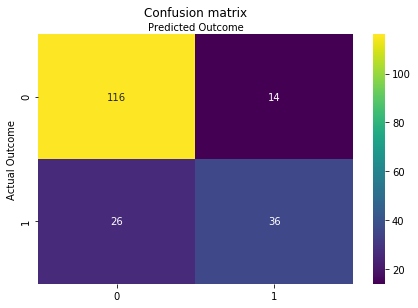

In [93]:
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cfm), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Outcome')
plt.xlabel('Predicted Outcome')

In [94]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) *100)
print("Precision:",metrics.precision_score(y_test, y_pred) * 100)
print("Recall:",metrics.recall_score(y_test, y_pred)*100)

Accuracy: 79.16666666666666
Precision: 72.0
Recall: 58.06451612903226


The classification's accuracy is 79%. Which is quite a good accuracy.

The precision of the model is 72%. Precision measures the correctness of the model when it makes predictions. In our model, our patients will suffer from diabetes 72% of the time.

If there are patients who have diabetes in the test set, Our Logistic Regression model can identify it 58% of the time.

###### ROC Curve:
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate(Recall) against the false positive rate. It shows the tradeoff between sensitivity and specificity. It tells how much the model is capable of distinguishing between classes.

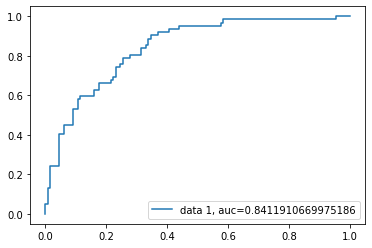

In [95]:
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC(Area Under Curve) score for the case is 0.84. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.